In [48]:
import numpy as np
from matplotlib import pyplot as plt
from helper import get_data

In [49]:
x1, x2, x3 = get_data()

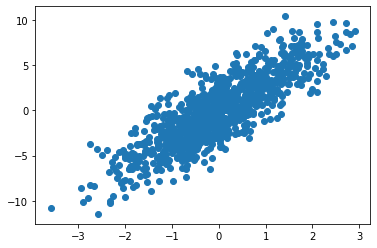

In [50]:
plt.scatter(x1, x3)

In [51]:
from scipy.stats import norm, multivariate_normal

In [52]:
def plot_hist_pdf(x, bins=100, density=True):
    plt.hist(x, bins=bins, density=density)
    mu = x.mean()
    sigma = x.std(ddof=1)

    xs = np.linspace(x.min(), x.max(), 100)
    pdf = norm.pdf(xs, mu, sigma)
    plt.plot(xs, pdf)


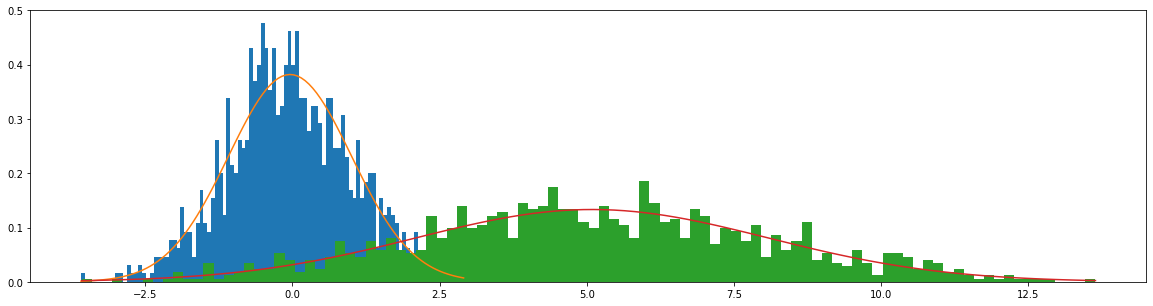

In [53]:
plt.figure(figsize=(20, 5))
plot_hist_pdf(x1)
plot_hist_pdf(x2)
# plot_hist_pdf(x3)

# Multi-variable

In [28]:
cov_mat = np.cov(x1, x3)

In [59]:
mus = [x1.mean(), x2.mean()]

In [68]:
x1_space = np.linspace(x1.min(), x1.max(), 100)
x2_space = np.linspace(x2.min(), x2.max(), 100)

In [103]:
xv, yv = np.meshgrid(x1_space, x2_space, sparse=False)
pos = np.dstack((xv, yv))
rv = multivariate_normal(mus, cov_mat)
mvg = rv.pdf(pos)

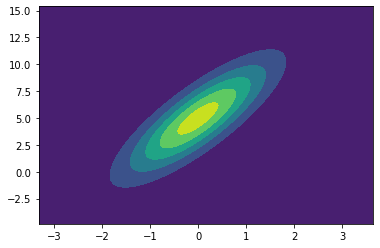

In [105]:
plt.contourf(x1_space, x2_space, mvg)

In [126]:
from mpl_toolkits.mplot3d import Axes3D


In [128]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, yv, mvg)
ax.view_init(elev=30., azim=0)